In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data=pd.read_csv("gld_price_data.csv")
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
gold_data.shape

(2290, 6)

In [4]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
gold_data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

<Axes: xlabel='GLD', ylabel='Count'>

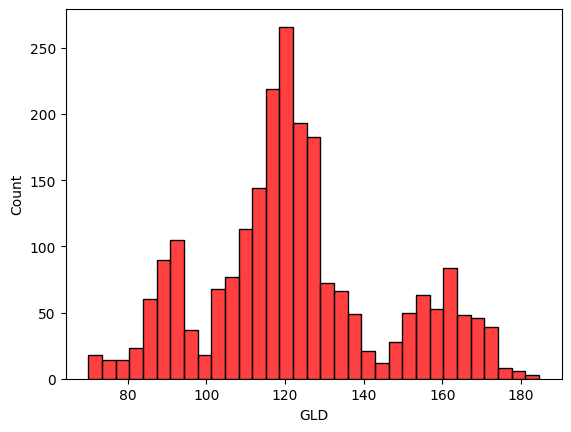

In [6]:
sns.histplot(gold_data["GLD"], color="red", kde=False) 

In [7]:
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data["GLD"]

In [8]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [9]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)  

In [11]:
regressor=RandomForestRegressor(n_estimators=10000)

In [12]:
regressor.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10000)

In [13]:
data_prediction=regressor.predict(x_test)

In [14]:
data_prediction

array([122.55088711, 130.24523485, 127.6383629 ,  97.64469613,
       118.94632537, 114.57209536, 124.85192767, 117.8874167 ,
       107.93947916,  98.62005457,  95.74599884, 167.4730463 ,
       147.71157013, 115.97898564, 170.87314633,  85.22388118,
       124.207096  , 109.24399821, 112.29504464, 131.59276493,
       124.21178642, 113.59845271, 115.54755772, 108.76609977,
       108.00697074, 125.85043862, 119.24035571, 112.61731687,
       113.21245456, 126.12934509, 146.09650066,  89.2170128 ,
       167.54705853, 113.62044032, 108.23027878, 120.29411685,
       141.47902657, 161.15937262, 173.8465326 , 153.0266143 ,
       119.52663261, 111.2704928 , 121.40271263, 113.71428033,
       122.10096163, 108.01196488,  88.12957398, 114.20925115,
       129.79480937, 117.92026312, 104.14773292, 129.86586859,
       107.31857499, 160.66331189, 131.64991973, 117.59015454,
       147.06248403, 136.37869475,  95.63961658, 124.64039847,
       114.72595151,  86.53057024, 104.28180514, 113.90

In [15]:
score=metrics.r2_score(y_test,data_prediction)
score

0.9904348102823298

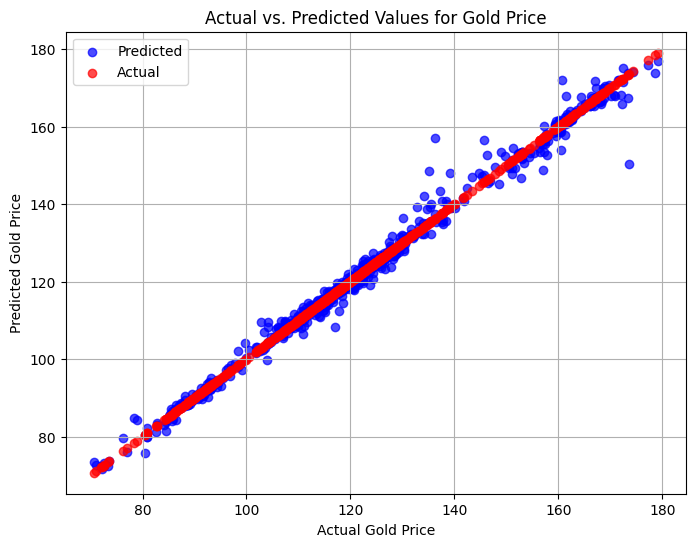

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, data_prediction, color='blue', label='Predicted', alpha=0.7)
plt.scatter(y_test, y_test, color='red', label='Actual', alpha=0.7)  # Plotting y = x line for comparison
plt.title('Actual vs. Predicted Values for Gold Price')
plt.xlabel('Actual Gold Price')
plt.ylabel('Predicted Gold Price')
plt.legend()
plt.grid(True)
plt.show()